# Covid19 Trend
20220713 Atsushi Ishida (aishida@kwansei.ac.jp)

## Epidemic curve

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
import warnings
warnings.filterwarnings('ignore')

厚生労働省の感染者データを引っ張ってくる．

In [2]:
pcr = pd.read_csv('https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv')
pcr = pcr[["Date","ALL"]]
pcr.columns = ["date","new_confirmed"]
pcr.index = pd.to_datetime(pcr['date'])
pcr = pcr.drop(columns=['date'])

pcr.tail()

,new_confirmed
date,
2022-07-08,50082
2022-07-09,54993
2022-07-10,54046
2022-07-11,37124
2022-07-12,75995


In [3]:
# 7日移動平均
pcr['moving_ave'] = pcr['new_confirmed'].rolling(7).mean()
pcr.tail()

,new_confirmed,moving_ave
date,,
2022-07-08,50082,34993.142857
2022-07-09,54993,39294.285714
2022-07-10,54046,43691.000000
2022-07-11,37124,46595.714286
2022-07-12,75995,52285.428571


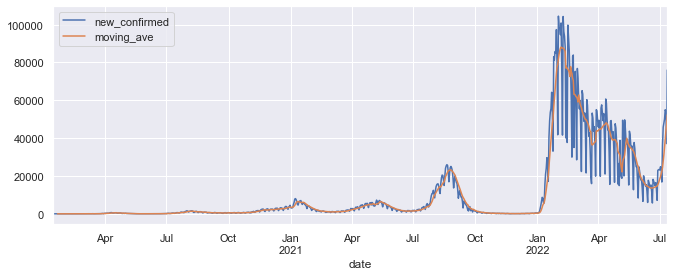

In [4]:
pcr.plot();

厚生労働省のpcr実施数データ．

In [5]:
pcr_test = pd.read_csv('https://www.mhlw.go.jp/content/pcr_tested_daily.csv')

pcr_test.columns = ['date', 'test']
pcr_test.index = pd.to_datetime(pcr_test['date'])
pcr_test = pcr_test.drop(columns=['date'])

pcr_test.tail()

,test
date,
2022-07-07,113303.0
2022-07-08,165011.0
2022-07-09,95578.0
2022-07-10,53736.0
2022-07-11,146743.0


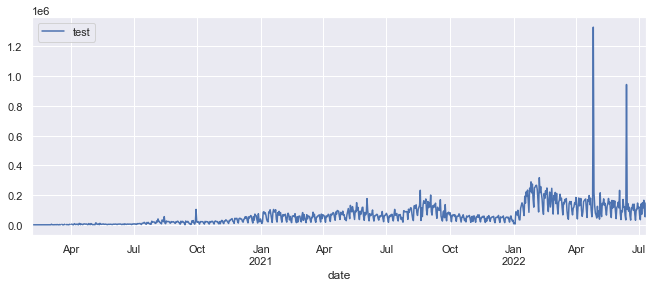

In [6]:
pcr_test.plot();

## Vaccination

Our World in Data (https://ourworldindata.org/) からワクチン接種のデータをもってくる．

In [7]:
vaccination = df = pd.read_csv(
    'https://covid.ourworldindata.org/data/owid-covid-data.csv', 
    usecols=['date', 'location', 'people_fully_vaccinated_per_hundred'], 
    parse_dates=['date'])

In [8]:
vaccinationJ = vaccination.loc[vaccination.location == "Japan"]

vaccinationJ.index = pd.to_datetime(vaccinationJ['date'])
vaccinationJ['people_fully_vaccinated_per_hundred'][0] = 0
vaccinationJ = vaccinationJ.drop(columns = ['location', 'date']).fillna(method='ffill')
vaccinationJ.head()

,people_fully_vaccinated_per_hundred
date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0


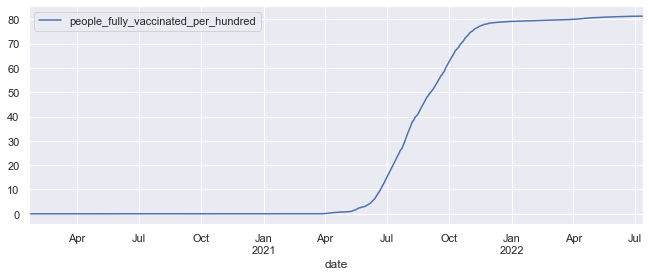

In [9]:
vaccinationJ.plot();

# Trends

In [10]:
mergedata = pcr.join(pcr_test)
mergedata = mergedata.join(vaccinationJ)
mergedata.head(10)

,new_confirmed,moving_ave,test,people_fully_vaccinated_per_hundred
date,,,,
2020-01-16,1,NaN,NaN,NaN
2020-01-17,0,NaN,NaN,NaN
2020-01-18,0,NaN,NaN,NaN
2020-01-19,0,NaN,NaN,NaN
2020-01-20,0,NaN,NaN,NaN
2020-01-21,0,NaN,NaN,NaN
2020-01-22,0,0.142857,NaN,0.0
2020-01-23,0,0.000000,NaN,0.0
2020-01-24,1,0.142857,NaN,0.0


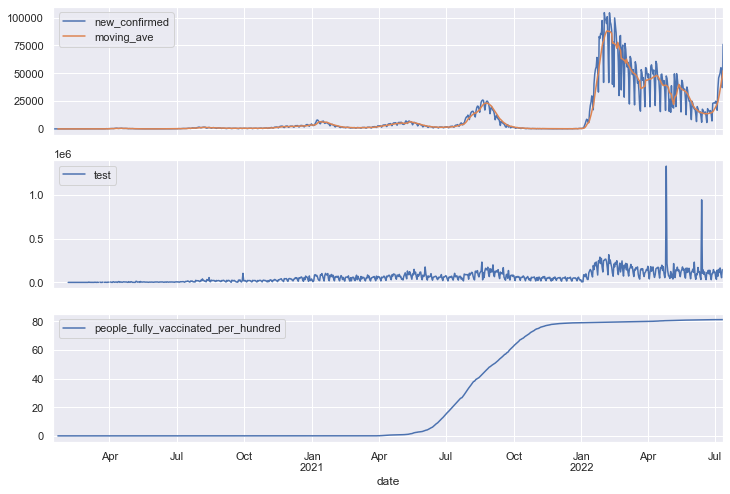

In [11]:
# plotting new positive case and transit
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(12, 8))

mergedata[['new_confirmed', 'moving_ave']].plot(ax=axes[0]).legend(loc='upper left')
mergedata[['test']].plot(ax=axes[1]).legend(loc='upper left')
mergedata[['people_fully_vaccinated_per_hundred']].plot(ax=axes[2]).legend(loc='upper left');
# plt.savefig('../JP_cov_epi_curve.pdf')